In [1]:
import pandas as pd
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from matplotlib.pylab import plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline;
from sklearn.model_selection import GridSearchCV

In [2]:
crop_data = pd.read_csv("./crops_Data.csv")

In [3]:
crop_data_dict = crop_data.to_dict()

In [4]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

In [5]:
crop_data_dict

{'crop_id': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 33,
  33: 34,
  34: 35,
  35: 36,
  36: 37,
  37: 38,
  38: 39,
  39: 40,
  40: 41,
  41: 42,
  42: 43,
  43: 44,
  44: 45,
  45: 46,
  46: 47,
  47: 48,
  48: 49,
  49: 50,
  50: 51},
 'crop_id.1': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31,
  31: 32,
  32: 33,
  33: 34,
  34: 35,
  35: 36,
  36: 37,
  37: 38,
  38: 39,
  39: 40,
  40: 41,
  41: 42,
  42: 43,
  43: 44,
  44: 45,
  45: 46,
  46: 47,
  47: 48,
  48: 49,
  49: 50,
  5

#### suppose we have demand of 5000
#### but production is less than the price is inc.
#### product is high to actual demand than price is dec. 

In [6]:
crops = list(crop_data_dict["Crops"].values())
prices = list(crop_data_dict["Average Price"].values())
crops_id = list(crop_data_dict["crop_id"].values())

In [7]:
prices

[1300,
 1850,
 1985,
 15500,
 1850,
 1375,
 1550,
 950,
 155,
 4500,
 3000,
 1550,
 1400,
 1465,
 1710,
 895,
 2135,
 1935,
 6125,
 1795,
 1025,
 3000,
 4000,
 1420,
 1665,
 2215,
 1420,
 4350,
 8500,
 2780,
 1800,
 2300,
 2021,
 5800,
 2000,
 6000,
 1520,
 7500,
 1700,
 1300,
 4000,
 1210,
 8500,
 6000,
 1500,
 6820,
 745,
 2500,
 2200,
 2500,
 2750]

In [8]:
crops

['Onion',
 'Potato',
 'Tomato',
 'Apple',
 'Bhindi',
 'Bitter Gourd',
 'Bottle Gourd',
 'Dry Fodder',
 'Green Fodder',
 'Peach',
 'Banana',
 'Brinjal',
 'Cabbage',
 'Water Melon',
 'Raddish',
 'Sponge Gourd',
 'Tinda',
 'Maize',
 'Sunflower',
 'Green Chilli',
 'Karbuja',
 'Lemon',
 'Mango',
 'Pumpkin',
 'Capsicum',
 'Coriander',
 'Cucumbar',
 'Ginger',
 'Grapes',
 'Colacasia',
 'Cauliflower',
 'Peas Wet',
 'Wheat',
 'Kinnow',
 'Leafy Vegetable',
 'Orange',
 'Carrot',
 'Chikoos(Sapota)',
 'Cluster Beans',
 'Garlic',
 'Guava',
 'Methi(Leaves)',
 'Pomegranate',
 'Toria',
 'French Beans',
 'Mustard',
 'Sweet Potato',
 'Pear',
 'Mousambi',
 'Jamun',
 'Ber']

In [9]:
crops_id

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [10]:
previous_demand = []
previous_production = []

# for now lets genrates random demand and production

In [11]:
for i in range(len(crops)):
    previous_demand.append(random.randint(30000,60000))
    previous_production.append(random.randint(30000,60000))

In [12]:
previous_demand

[54125,
 34517,
 42433,
 58506,
 31150,
 32180,
 46280,
 56570,
 55370,
 30198,
 35408,
 44197,
 50881,
 55313,
 50341,
 50359,
 53161,
 37286,
 51049,
 51619,
 47041,
 56285,
 44498,
 42229,
 44332,
 50599,
 47263,
 57381,
 59852,
 43009,
 48274,
 53212,
 37807,
 45002,
 46432,
 42758,
 45999,
 51881,
 48353,
 40910,
 53426,
 46779,
 45705,
 41689,
 32880,
 36033,
 32491,
 53754,
 35635,
 43836,
 30057]

In [13]:
result_csv = []

In [14]:
prices

[1300,
 1850,
 1985,
 15500,
 1850,
 1375,
 1550,
 950,
 155,
 4500,
 3000,
 1550,
 1400,
 1465,
 1710,
 895,
 2135,
 1935,
 6125,
 1795,
 1025,
 3000,
 4000,
 1420,
 1665,
 2215,
 1420,
 4350,
 8500,
 2780,
 1800,
 2300,
 2021,
 5800,
 2000,
 6000,
 1520,
 7500,
 1700,
 1300,
 4000,
 1210,
 8500,
 6000,
 1500,
 6820,
 745,
 2500,
 2200,
 2500,
 2750]

In [15]:
for year in years:
    for i in range(0,len(crops)):
        crop = crops[i]
        demand30 = 1000  #int(previous_demand[i] * 0.30)
        production30 = 1000 # int(previous_production[i] * 0.30)
        demand = random.randint(max(previous_demand[i] - demand30,200),previous_demand[i]+demand30)
        production = random.randint(max(previous_production[i] - production30,200),previous_production[i]+production30)
        # find percentage of changes in production - demand = require | extra
#         4000
        previousPrice = prices[i]
        price = random.randint(max(prices[i] - 1000,200),prices[i]+1000)
        newCrop = {
            "year":year,
            "crop_id" : crops_id[i],
            "crop":crops[i],
            "production":production,
            "demand":demand,
            "price":price
        }
        previous_demand[i] = demand
        previous_production[i] = production
#         prices[i] = price 
        result_csv.append(newCrop)

In [16]:
result_Df = pd.DataFrame(result_csv)

In [104]:
X = pd.DataFrame(result_csv,columns={"crop_id","demand","production"})
Y = pd.DataFrame(result_csv,columns={"price"})

In [105]:
x_train , x_test , y_train, y_test = X[:450] , X[450:] ,Y[:450] ,Y[450:]

In [106]:
model = KNeighborsRegressor(n_neighbors=3)

In [107]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [108]:
result = model.predict(x_test)

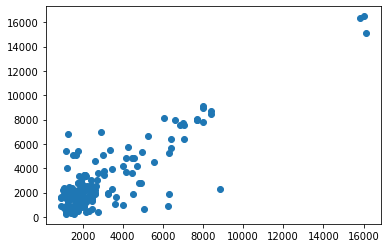

In [109]:
plt.scatter(result,y_test)

In [110]:
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=3))
])

In [111]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=3))])

In [112]:
result2 =pipe.predict(x_test)

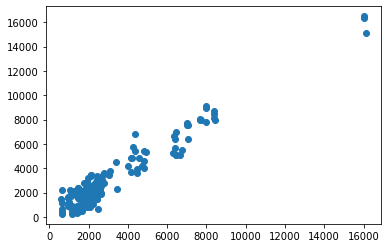

In [113]:
plt.scatter(result2,y_test)

# export data

In [114]:
result_Df.to_csv("./crops_data_extended.csv")

In [115]:
result_Df

,year,crop_id,crop,production,demand,price
0,2010,1,Onion,31048,54630,2075
1,2010,2,Potato,34588,33964,1424
2,2010,3,Tomato,42475,42760,2060
3,2010,4,Apple,38040,58933,15697
4,2010,5,Bhindi,47148,30815,1795
...,...,...,...,...,...,...
607,2021,47,Sweet Potato,51920,33782,248
608,2021,48,Pear,43184,54925,2050
609,2021,49,Mousambi,43251,34886,3165
610,2021,50,Jamun,41824,44175,3005


In [116]:
result2_df = pd.DataFrame(result2)

In [117]:
result2_df

,0
0,8388.333333
1,6455.666667
2,2090.000000
3,7068.333333
4,1154.000000
...,...
157,1154.000000
158,2137.333333
159,1990.666667
160,2403.666667


# find demand 

In [118]:
X_Demand = pd.DataFrame(result_csv,columns={"year","crop_id"})
Y_Demand = pd.DataFrame(result_csv,columns={"demand"})

In [119]:
x_dem_train , x_dem_test, y_dem_train, y_dem_test = X_Demand[0:400] , X_Demand[400:] , Y_Demand[0:400] , Y_Demand[400:]

In [120]:
demand_model = KNeighborsRegressor(n_neighbors=1)

In [121]:
demand_model.fit(x_dem_train,y_dem_train)

KNeighborsRegressor(n_neighbors=1)

In [122]:
demand_Res = demand_model.predict(x_dem_test)

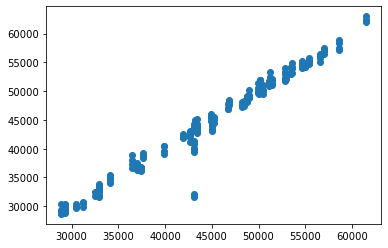

In [123]:
plt.scatter(demand_Res,y_dem_test)

In [124]:
mod = GridSearchCV(model,
            param_grid={
                "n_neighbors":[1,2,3,4,5,6,7,8,9,10]
            })

In [125]:
mod.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [126]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004730,0.001317,0.005031,0.000982,1,{'n_neighbors': 1},0.539633,0.789268,0.725218,0.654491,0.685965,0.678915,0.082907,10
1,0.002819,0.000104,0.002885,0.000161,2,{'n_neighbors': 2},0.647418,0.817757,0.769334,0.672291,0.700965,0.721553,0.063063,8
2,0.002701,0.000027,0.002872,0.000093,3,{'n_neighbors': 3},0.716067,0.798032,0.817063,0.719305,0.739179,0.757929,0.041715,6
3,0.002687,0.000007,0.002746,0.000011,4,{'n_neighbors': 4},0.701719,0.809728,0.797730,0.745828,0.750901,0.761181,0.038909,5
4,0.002682,0.000018,0.002762,0.000015,5,{'n_neighbors': 5},0.725967,0.824196,0.822580,0.739078,0.734580,0.769280,0.044382,3
5,0.002687,0.000011,0.002775,0.000012,6,{'n_neighbors': 6},0.737187,0.816851,0.809618,0.742674,0.762432,0.773752,0.033391,1
6,0.002681,0.000015,0.002812,0.000074,7,{'n_neighbors': 7},0.716691,0.831815,0.818096,0.739044,0.760611,0.773252,0.044654,2
7,0.002677,0.000017,0.002808,0.000018,8,{'n_neighbors': 8},0.715949,0.823677,0.809811,0.730367,0.736341,0.763229,0.044412,4
8,0.002681,0.000014,0.002821,0.000024,9,{'n_neighbors': 9},0.694133,0.801337,0.767428,0.725126,0.703644,0.738333,0.040367,7
9,0.002695,0.000016,0.002835,0.000017,10,{'n_neighbors': 10},0.668845,0.757213,0.721346,0.703241,0.662251,0.702579,0.034934,9


# find production

In [127]:
X_Production = pd.DataFrame(result_csv,columns={"year","crop_id"})
Y_Production = pd.DataFrame(result_csv,columns={"production"})

In [128]:
x_pro_train , x_pro_test, y_pro_train, y_pro_test = X_Production[0:200] , X_Production[400:] , Y_Production[0:200] , Y_Production[400:]

In [129]:
production_model = KNeighborsRegressor(n_neighbors=1)

In [130]:
production_model.fit(x_pro_train,y_pro_train)

KNeighborsRegressor(n_neighbors=1)

In [131]:
production_res = production_model.predict(x_pro_test)

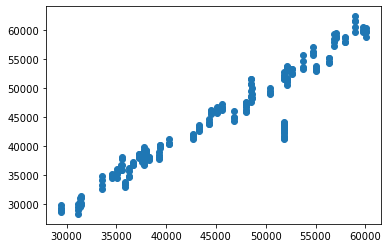

In [132]:
plt.scatter(production_res,y_pro_test)

In [133]:
production_grid = GridSearchCV(production_model,
            param_grid={
                "n_neighbors":[1,2,3,4,5,6,7,8,9,10]
            })

In [134]:
production_grid.fit(x_pro_train,y_pro_train)

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [135]:
pd.DataFrame(production_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003352,0.000679,0.003295,0.000142,1,{'n_neighbors': 1},0.994952,0.994782,0.993440,0.960962,0.995787,0.987985,0.013532,1
1,0.002751,0.000118,0.003997,0.002013,2,{'n_neighbors': 2},0.573025,0.910290,0.997870,0.972606,0.554907,0.801740,0.196307,2
2,0.002673,0.000079,0.002767,0.000119,3,{'n_neighbors': 3},0.486633,0.741502,0.883777,0.780183,0.469689,0.672357,0.165332,3
3,0.002621,0.000016,0.002647,0.000019,4,{'n_neighbors': 4},0.703095,0.642692,0.681493,0.612888,0.689310,0.665896,0.033237,4
4,0.002599,0.000014,0.002636,0.000018,5,{'n_neighbors': 5},0.573968,0.538762,0.601911,0.571851,0.580696,0.573438,0.020340,5
5,0.002600,0.000015,0.002631,0.000016,6,{'n_neighbors': 6},0.464864,0.454790,0.539784,0.549547,0.470805,0.495958,0.040216,8
6,0.002589,0.000016,0.002666,0.000083,7,{'n_neighbors': 7},0.471323,0.520710,0.650903,0.662555,0.403202,0.541739,0.101101,6
7,0.002600,0.000009,0.002647,0.000015,8,{'n_neighbors': 8},0.455904,0.495622,0.569220,0.574754,0.392880,0.497676,0.068980,7
8,0.002656,0.000143,0.002721,0.000173,9,{'n_neighbors': 9},0.393151,0.461180,0.506107,0.540886,0.332725,0.446810,0.075456,9
9,0.003114,0.000082,0.003210,0.000199,10,{'n_neighbors': 10},0.386599,0.429334,0.481851,0.534074,0.305830,0.427538,0.078476,10
